In [1]:
options(warn=-1)
require(tseries)
require(ggplot2)
require(zoo)
require(ggfortify)
require(ggthemes)
require(gridExtra)
require(tidyverse)

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: ggplot2

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: ggfortify

Loading required package: ggthemes

Loading required package: gridExtra

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



#### Exercise 1

In [2]:
start = "2019-12-02"
end = "2020-12-01"
mcd = fortify(na.omit(get.hist.quote("MCD", quote="Close", start=start, end=end, retclass="zoo")))
aapl = fortify(na.omit(get.hist.quote("AAPL", quote="Close", start=start, end=end, retclass="zoo")))
jpm = fortify(na.omit(get.hist.quote("JPM", quote="Close", start=start, end=end, retclass="zoo")))

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




time series ends   2020-11-30
time series ends   2020-11-30
time series ends   2020-11-30


Calculate the discrete returns for these stocks.

In [3]:
df = data.frame(
    time = mcd$Index,
    mcd = mcd$Close,
    aapl = aapl$Close,
    jpm = jpm$Close
)
df = df %>% add_column(
    # discrete returns
    mcd_Rt = c(0, (.$mcd[-1] - .$mcd[-(length(df$mcd))])/.$mcd[-(length(.$mcd))]),
    aapl_Rt = c(0, (.$aapl[-1] - .$aapl[-(length(df$aapl))])/.$aapl[-(length(.$aapl))]),
    jpm_Rt = c(0, (.$jpm[-1] - .$jpm[-(length(df$jpm))])/.$jpm[-(length(.$jpm))]),
    # continuous returns
    mcd_rt = c(0, (log(.$mcd[-1]) - log(.$mcd[-(length(df$mcd))]))),
    aapl_rt = c(0, (log(.$aapl[-1]) - log(.$aapl[-(length(df$aapl))]))),
    jpm_rt = c(0, (log(.$jpm[-1]) - log(.$jpm[-(length(df$jpm))])))
)

Consider a portfolio consisting of McDonalds, Apple and JP Morgan stocks. For simplicity assume that the weights are constant wMcD = 0.1, wApple = 0.4, wJPM = 0.5

In [4]:
wMcD = 0.1
wApple = 0.4
wJPM = 0.5

df = df %>% add_column(port = wMcD * .$mcd_Rt + wApple * .$aapl_Rt + wJPM * .$jpm_Rt)

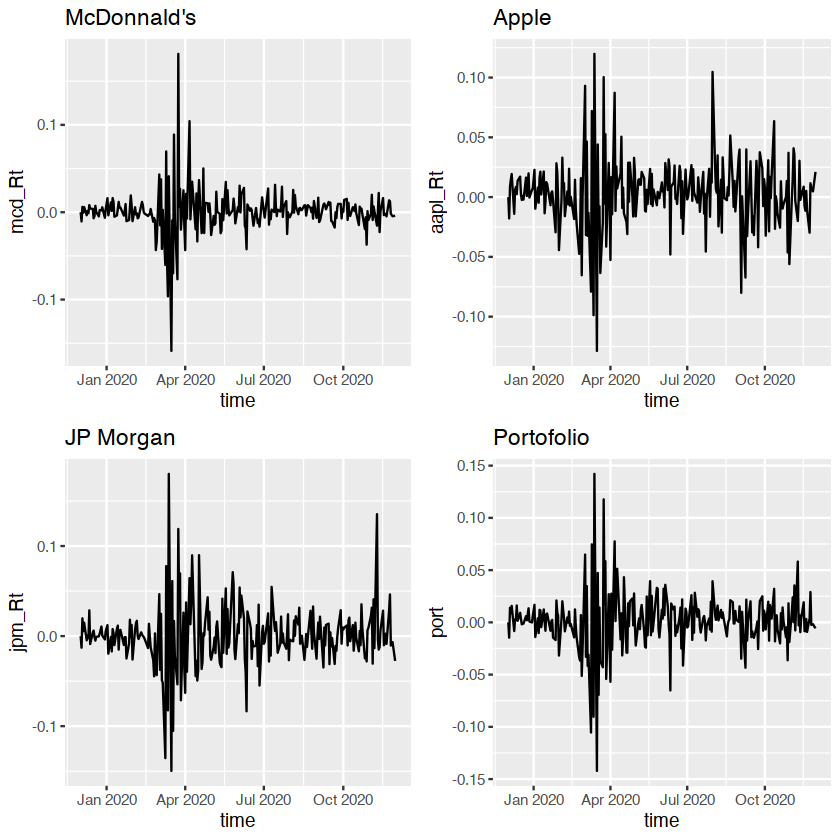

In [5]:
p1 = ggplot(aes(x=time, y=mcd_Rt), data=df) + geom_line() + labs(title="McDonnald's")
p2 = ggplot(aes(x=time, y=aapl_Rt), data=df) + geom_line() + labs(title="Apple")
p3 = ggplot(aes(x=time, y=jpm_Rt), data=df) + geom_line() + labs(title="JP Morgan")
p4 = ggplot(aes(x=time, y=port), data=df) + geom_line() + labs(title="Portofolio")
grid.arrange(p1, p2, p3, p4, nrow=2)

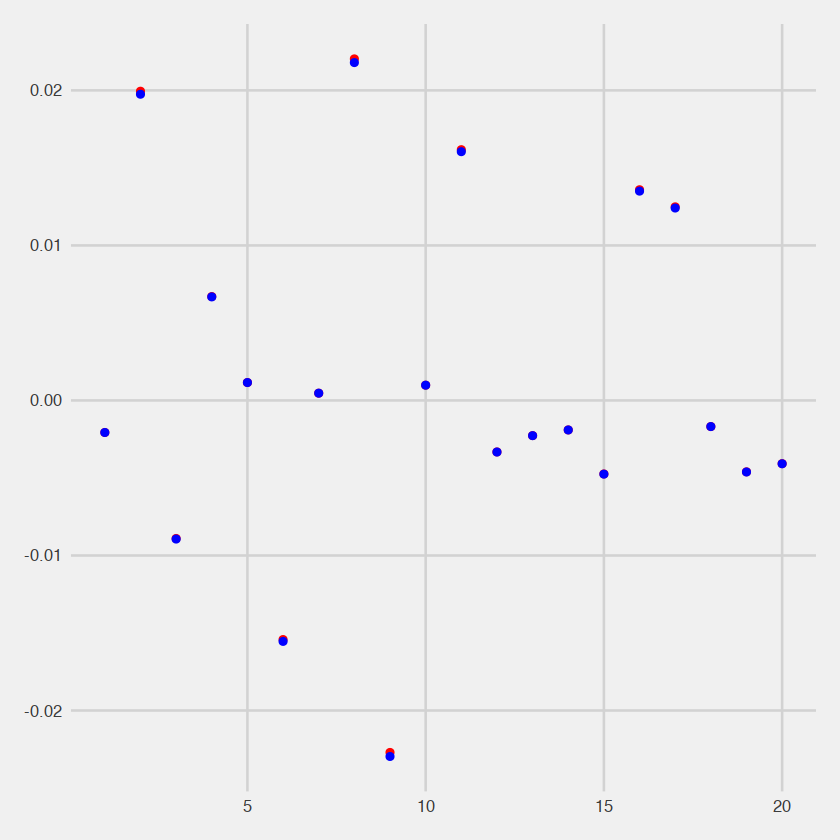

In [6]:
last_twenty = tail(df, n=20)
ggplot(aes(seq(1:20), mcd_Rt), data=last_twenty) + 
    geom_point(col="red") + 
    geom_point(aes(seq(1:20), mcd_rt), col="blue") + 
    theme_fivethirtyeight()

Calculate the approximated continuous portfolio return

In [7]:
df = df %>% add_column(port_rt = wMcD * .$mcd_rt + wApple * .$aapl_rt + wJPM * .$jpm_rt)

Compare the exact and the approximated continuous portfolio return for the last 20
observations in your sample. Again use a scatter plot and different colours. Comment
on the approximation

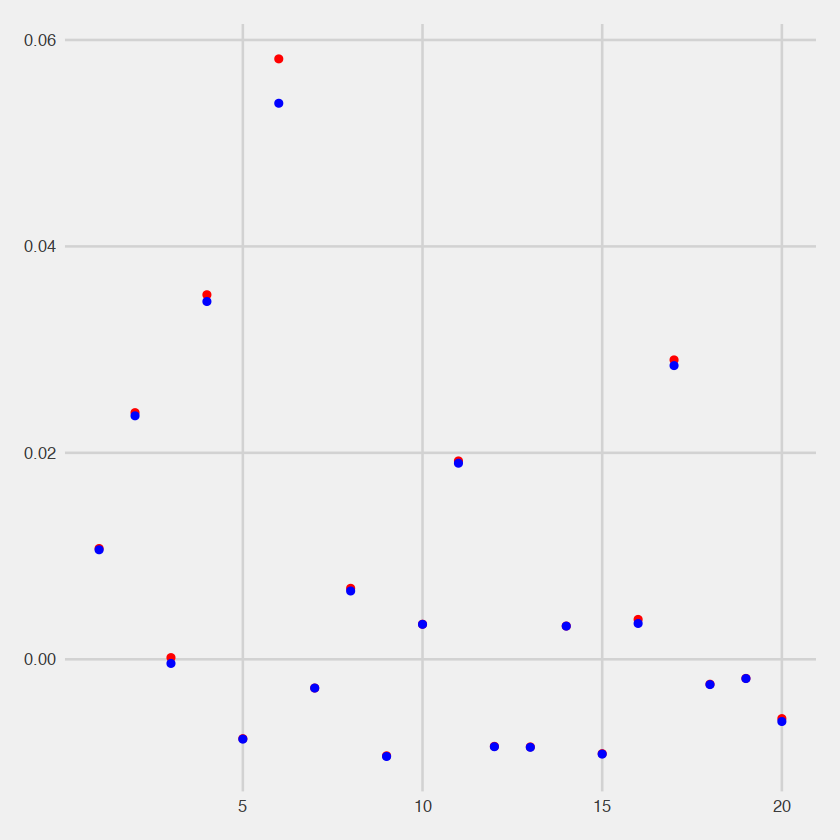

In [8]:
ggplot(aes(seq(1:20), port), data=tail(df, n=20)) + 
    geom_point(col="red") + 
    geom_point(aes(seq(1:20), port_rt), col="blue") + 
    theme_fivethirtyeight()

#### Exercise 2

In [9]:
options(warn=1)
require(rmutil)

Loading required package: rmutil

Warning message:
“package ‘rmutil’ was built under R version 4.1.1”
Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr


Attaching package: ‘rmutil’


The following object is masked from ‘package:tidyr’:

    nesting


The following object is masked from ‘package:stats’:

    nobs


The following objects are masked from ‘package:base’:

    as.data.frame, units




In [10]:
mu = 0.005
sig_sq = 0.0017

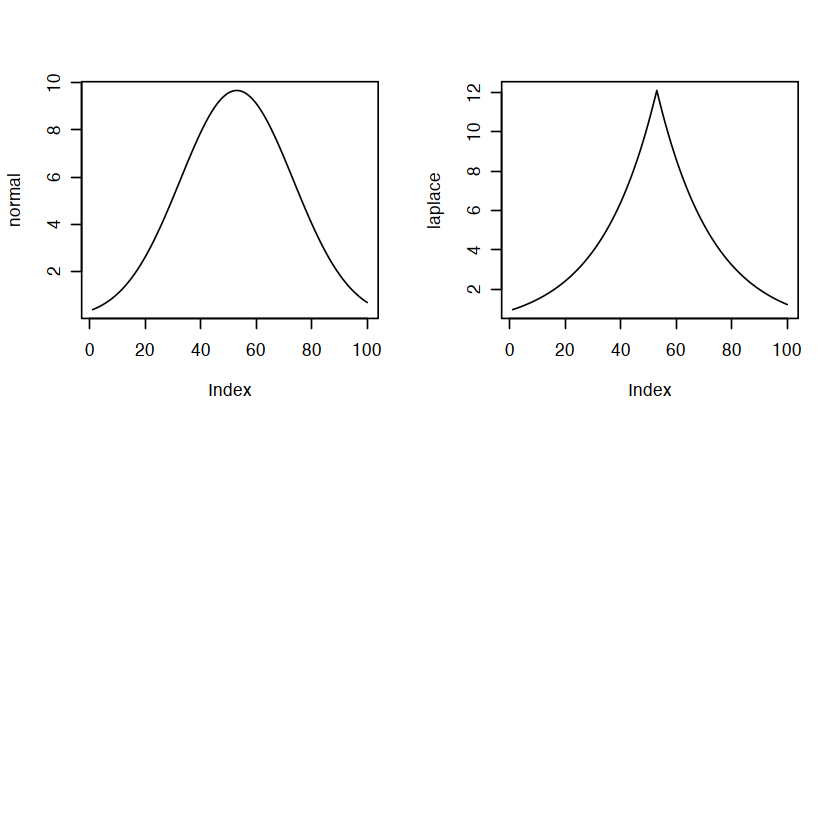

In [11]:
x = seq(-0.1, 0.1, length=100)
normal = dnorm(x, mean=mu, sd=sqrt(sig_sq))
laplace = dlaplace(x, m=mu, s=sqrt(sig_sq))
par(mfrow=c(2,2))
plot(normal, type="l")
plot(laplace, type="l")

Give the PDF of the 10-day discrete return of the trading portfolio.

Variable transformation with $r_t$ = log($R_t$ + 1)

Give the PDF of a standardised Laplace random variable. Using R calculate the 1%-
and the 5%- quantiles of this distribution and compare them with the corresponding
quantiles of the standard normal distribution.

$f(x) = \frac{1}{\sqrt{2}}e^{-\sqrt{2}|x|}$

In [15]:
print("Laplace")
qlaplace(0.01)
qlaplace(0.05)
print("Normal")
qnorm(0.01)
qnorm(0.05)

[1] "Laplace"


[1] -3.912023

[1] -2.302585

[1] "Normal"


[1] -2.326348

[1] -1.644854

In [13]:
exp(qlaplace(0.99)) - 1
exp(qlaplace(0.95)) - 1

[1] 49

[1] 9

Let the value of the trading portfolio be £1,000,000. Using your results from a) - d)
calculate the VaR (for h = 10 trading days and α = 0.99). Ignoring the specific risk
charge (SRC), calculate the Market Risk Charge (MRC) under Basel II if it is further
known that

In [14]:
abs(10^6 * sqrt(10) * qlaplace(0.01, m=mu, s=sqrt(sig_sq)))

[1] 494254